In [1]:
from google.colab import files
uploaded = files.upload()

Saving trends_kj_sisters.csv to trends_kj_sisters.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# Read and inspect the dataset
trends = pd.read_csv('trends_kj_sisters.csv')
trends.head()

,Month,Kim Kardashian: (Worldwide),Khloé Kardashian: (Worldwide),Kourtney Kardashian: (Worldwide),Kendall Jenner: (Worldwide),Kylie Jenner: (Worldwide)
0,2007-01,2,<1,<1,<1,2
1,2007-02,12,<1,<1,<1,2
2,2007-03,9,<1,<1,<1,1
3,2007-04,6,<1,<1,<1,1
4,2007-05,6,<1,<1,<1,2


In [4]:
# Make column names easier to work with
trends.columns = ['month', 'kim', 'khloe', 'kourtney', 'kendall', 'kylie']
# Inspect data
trends.head()

,month,kim,khloe,kourtney,kendall,kylie
0,2007-01,2,<1,<1,<1,2
1,2007-02,12,<1,<1,<1,2
2,2007-03,9,<1,<1,<1,1
3,2007-04,6,<1,<1,<1,1
4,2007-05,6,<1,<1,<1,2


In [5]:
# Inspect data types
trends.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147 entries, 0 to 146
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   month     147 non-null    object
 1   kim       147 non-null    int64 
 2   khloe     147 non-null    object
 3   kourtney  147 non-null    object
 4   kendall   147 non-null    object
 5   kylie     147 non-null    int64 
dtypes: int64(2), object(4)
memory usage: 7.0+ KB


In [6]:
# Loop through columns
for column in trends.columns:
    # Only modify columns that have the "<" sign
    if "<" in trends[column].to_string():
        # Remove "<" and convert dtype to integer
        trends[column] = trends[column].str.replace('<', '')
        trends[column] = pd.to_numeric(trends[column])

# Inspect data types and data
trends.info()
trends.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147 entries, 0 to 146
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   month     147 non-null    object
 1   kim       147 non-null    int64 
 2   khloe     147 non-null    int64 
 3   kourtney  147 non-null    int64 
 4   kendall   147 non-null    int64 
 5   kylie     147 non-null    int64 
dtypes: int64(5), object(1)
memory usage: 7.0+ KB


,month,kim,khloe,kourtney,kendall,kylie
0,2007-01,2,1,1,1,2
1,2007-02,12,1,1,1,2
2,2007-03,9,1,1,1,1
3,2007-04,6,1,1,1,1
4,2007-05,6,1,1,1,2


In [7]:
# Convert month to type datetime
trends["month"] = pd.to_datetime(trends.month)

# Inspect data types and data
trends.info()
trends.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147 entries, 0 to 146
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   month     147 non-null    datetime64[ns]
 1   kim       147 non-null    int64         
 2   khloe     147 non-null    int64         
 3   kourtney  147 non-null    int64         
 4   kendall   147 non-null    int64         
 5   kylie     147 non-null    int64         
dtypes: datetime64[ns](1), int64(5)
memory usage: 7.0 KB


,month,kim,khloe,kourtney,kendall,kylie
0,2007-01-01,2,1,1,1,2
1,2007-02-01,12,1,1,1,2
2,2007-03-01,9,1,1,1,1
3,2007-04-01,6,1,1,1,1
4,2007-05-01,6,1,1,1,2


In [8]:
# Set month as DataFrame index
trends = trends.set_index('month')
# Inspect the data
trends.head()

,kim,khloe,kourtney,kendall,kylie
month,,,,,
2007-01-01,2,1,1,1,2
2007-02-01,12,1,1,1,2
2007-03-01,9,1,1,1,1
2007-04-01,6,1,1,1,1
2007-05-01,6,1,1,1,2


In [10]:
sns.set(font_scale=1.5, rc={"figure.figsize":(8,6)})
sns.set_style("ticks")

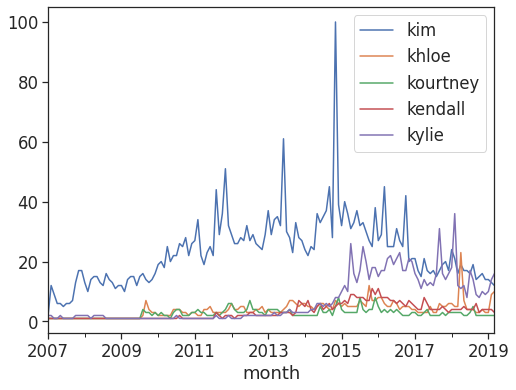

In [11]:
# Plot search interest vs. month
trends.plot()
plt.show()

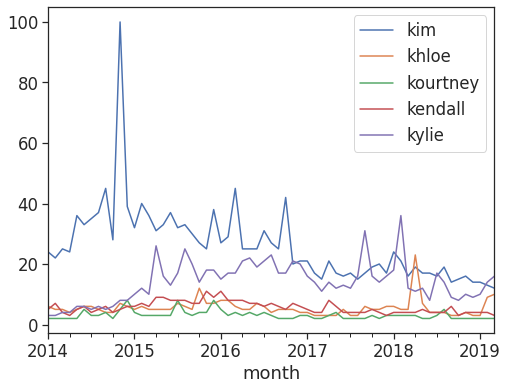

In [12]:
# Zoom in from January 2014
trends.loc['2014-01-01':].plot()
plt.show()

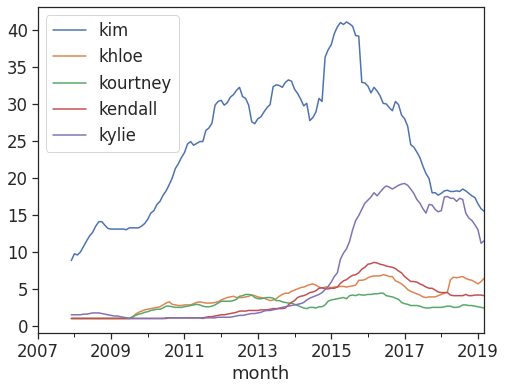

In [13]:
# Smooth the data with rolling means
trends.rolling(window=12).mean().plot()
plt.show()

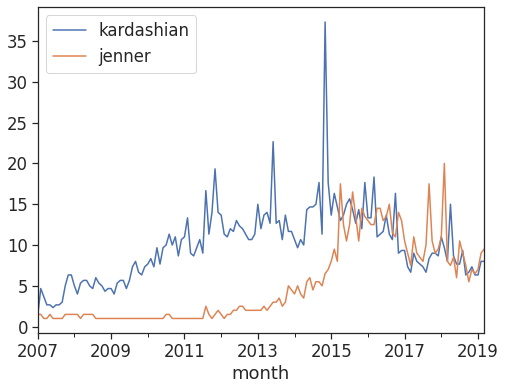

In [14]:
# Average search interest for each family line
trends['kardashian'] = (trends.kim + trends.khloe + trends.kourtney) / 3
trends['jenner'] = (trends.kendall + trends.kylie) / 2

# Plot average family line search interest vs. month
trends[['kardashian', 'jenner']].plot()
plt.show()